# Continuous Control

---


### The Environment

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.20 which is incompatible.


In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### State and Action Spaces

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


## Train agent

In [5]:
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

In [6]:
def ddpg(n_episodes=1000, max_t=1000, train=False, score_target=float("inf"), print_every=100):

    scores = []  # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores

    for i_episode in range(1, n_episodes + 1):
        
        env_info = env.reset(train_mode=train)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state

        agent.reset()
        score = 0
        
        for t in range(max_t):
            
            action = agent.act(state)                      # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            
            if train:
                agent.step(state, action, reward, next_state, done)

            state = next_state
            score += reward

            if done:
                break

        scores_window.append(score)
        scores.append(score)

        if i_episode % print_every == 0:
            print("\rEpisode {}\tAverage Score: {:.2f}".format(i_episode, np.mean(scores_window)))

        if np.mean(scores_window) >= score_target:
            print("\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}".format(i_episode - 100, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), "checkpoint_actor.pth")
            torch.save(agent.critic_local.state_dict(), "checkpoint_critic.pth")
            break

    return scores

In [7]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=0)

scores = ddpg(train=True, score_target=31, print_every=10)

Episode 10	Average Score: 0.43
Episode 20	Average Score: 1.04
Episode 30	Average Score: 1.26
Episode 40	Average Score: 1.75
Episode 50	Average Score: 2.21
Episode 60	Average Score: 2.83
Episode 70	Average Score: 3.36
Episode 80	Average Score: 3.97
Episode 90	Average Score: 4.68
Episode 100	Average Score: 5.18
Episode 110	Average Score: 6.71
Episode 120	Average Score: 8.36
Episode 130	Average Score: 10.27
Episode 140	Average Score: 12.05
Episode 150	Average Score: 14.07
Episode 160	Average Score: 15.97
Episode 170	Average Score: 18.28
Episode 180	Average Score: 20.15
Episode 190	Average Score: 22.26
Episode 200	Average Score: 24.70
Episode 210	Average Score: 26.24
Episode 220	Average Score: 28.01
Episode 230	Average Score: 29.43
Episode 240	Average Score: 30.96

Environment solved in 141 episodes!	Average Score: 31.10


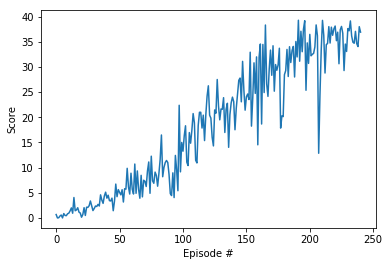

In [8]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig("plot.jpg")
plt.show()

## Run agent

In [9]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=0)

agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

scores = ddpg(n_episodes=1, train=False)
scores

[36.47999918460846]

In [10]:
env.close()